coucou Hugo


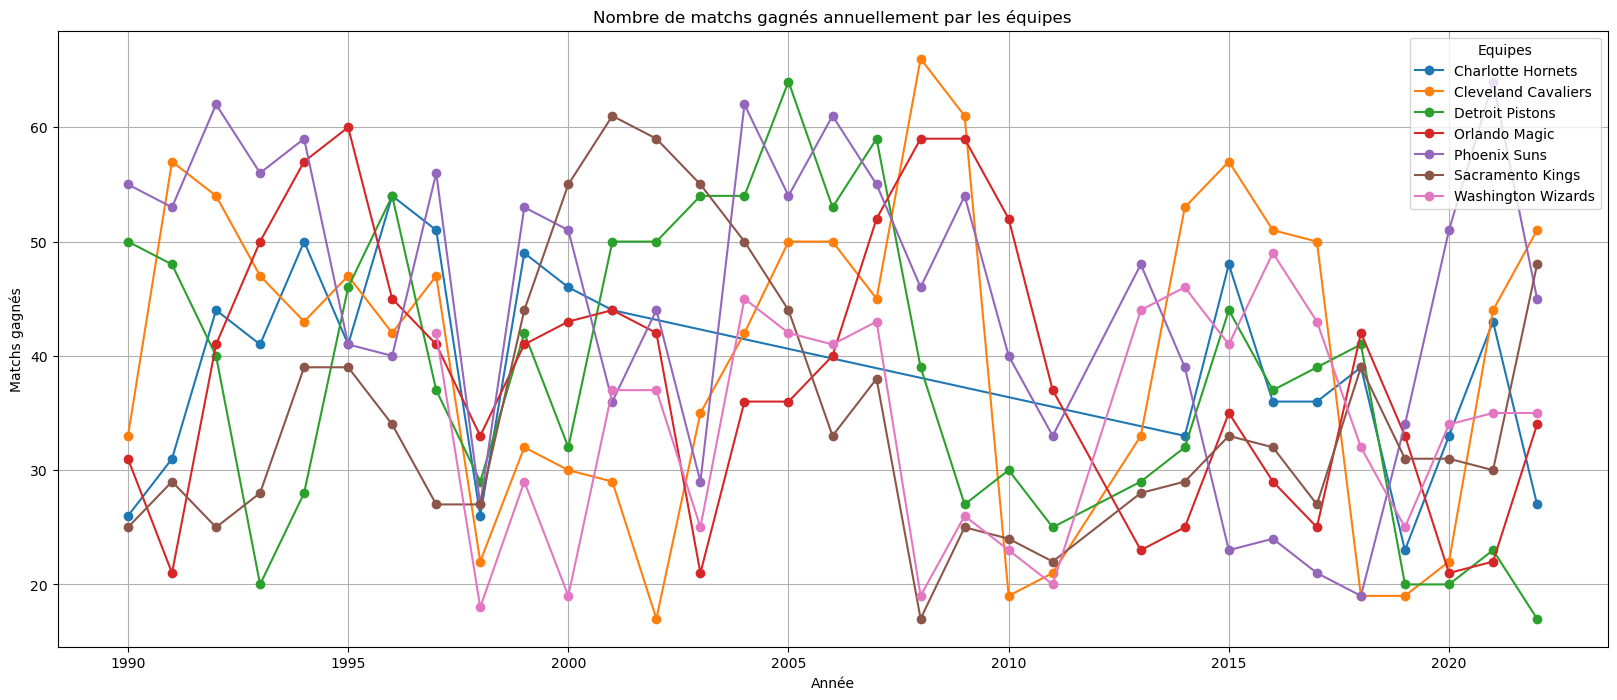

In [191]:
import matplotlib.pyplot as plt
import pandas as pd
df_game = pd.read_csv('game.csv')
# on garde que la "Regular Season"
df_game = df_game[df_game['season_type'].isin(['Regular Season'])]

print('coucou Hugo')

#POUR CHANGER LES ANNEES C'EST ICI !!!!!!!!!!!!!!!!!!!!!!!!!!! (garder le 2 devant 2010)

# on garde que les années supérieures à 2010
df_game= df_game[df_game['season_id'] >= 21990]

# on garde que les colonnes suivantes : 'season_id', 'team_name_home', 'wl_home', 'team_name_away', 'wl_away'
df_game = df_game.loc[:,['season_id', 'team_name_home', 'wl_home', 'team_name_away', 'wl_away']]
df_game

# conversion de season_id en année
def supprimer_premier_2(valeur):
    valeur_str = str(valeur)
    return int(valeur_str.replace('2', '', 1)) if '2' in valeur_str else valeur

df_game['season_id'] = df_game['season_id'].apply(supprimer_premier_2)
df_game['season_id'] = pd.to_datetime(df_game['season_id'], format='%Y').dt.year
df_game

# total des matchs 'away' gagnés par saison
df_new_game_away = df_game.groupby(['team_name_away', 'season_id'])['wl_away'].value_counts().reset_index(name='total_away')
df_new_game_away = df_new_game_away.sort_values(by=['team_name_away', 'season_id', 'wl_away'])

# on conserve que les matchs gagnés
df_new_game_away = df_new_game_away.loc[df_new_game_away['wl_away'] == 'W'].reset_index()
df_new_game_away

# total des matchs 'home' gagnés par saison
df_new_game_home = df_game.groupby(['team_name_home', 'season_id'])['wl_home'].value_counts().reset_index(name='total_home')
df_new_game_home = df_new_game_home.sort_values(by=['team_name_home', 'season_id', 'wl_home'])

# on conserve que les matchs gagnés
df_new_game_home = df_new_game_home.loc[df_new_game_home['wl_home'] == 'W'].reset_index()
df_new_game_home

# on rassemble le total_away
df_new_game_home.insert(loc=len(df_new_game_home.columns), column='total_away', value=df_new_game_away['total_away'])
df_new_game_home

# somme des home + away
colomns_list = ['total_home', 'total_away']
df_new_game_home['somme'] = df_new_game_home[colomns_list].sum(axis=1)
df_new_game_home

# suppression des colonnes inutiles
df_new_game = df_new_game_home.loc[:,['team_name_home', 'season_id', 'somme']]
df_new_game
df_draft_history = pd.read_csv('draft_history.csv')
df_draft_history = df_draft_history[df_draft_history["overall_pick"] <= 14]
list_team = df_draft_history['team_city'] + ' ' + df_draft_history['team_name']
list_team = list_team.value_counts().index
list_team
list = ['Washington Wizards', 'Detroit Pistons', 'Cleveland Cavaliers', 'Phoenix Suns', 'Sacramento Kings', 'Charlotte Hornets', 'Orlando Magic']
df_selectionne = df_new_game[df_new_game['team_name_home'].isin(list)]

# Tracer un graphique en ligne pour chaque nom
plt.figure(figsize=(20, 8))

# Utiliser groupby pour tracer des lignes pour chaque nom
for nom, group in df_selectionne.groupby('team_name_home'):
    plt.plot(group['season_id'], group['somme'], marker='o', linestyle='-', label=nom)

# Ajouter des titres et des labels
plt.title('Nombre de matchs gagnés annuellement par les équipes')
plt.xlabel('Année')
plt.ylabel('Matchs gagnés')
plt.legend(title='Equipes')
plt.grid(True)

# Afficher le graphique
plt.show()

In [192]:
#LE DF QU'ON DOIT UTILISER POUR AVOIR LA SOMME DES MATCHS GAGNÉ = LA PERFORMANCE DES EQUIPES
df_new_game_home['somme']


0      43
1      38
2      43
3      57
4      42
       ..
931    32
932    25
933    34
934    35
935    35
Name: somme, Length: 936, dtype: int64

In [193]:
df_new_game_home

,index,team_name_home,season_id,wl_home,total_home,total_away,somme
0,0,Atlanta Hawks,1990,W,29,14,43
1,2,Atlanta Hawks,1991,W,23,15,38
2,4,Atlanta Hawks,1992,W,25,18,43
3,6,Atlanta Hawks,1993,W,36,21,57
4,8,Atlanta Hawks,1994,W,24,18,42
...,...,...,...,...,...,...,...
931,1862,Washington Wizards,2018,W,22,10,32
932,1865,Washington Wizards,2019,W,16,9,25
933,1866,Washington Wizards,2020,W,19,15,34
934,1868,Washington Wizards,2021,W,21,14,35


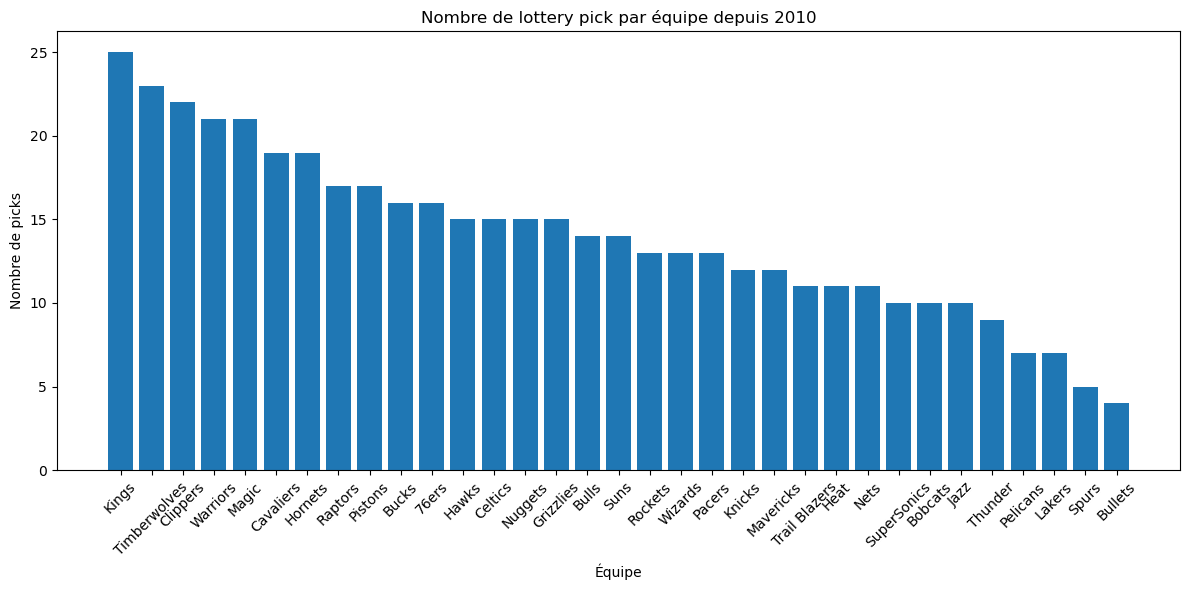

      overall_pick      team_name  season
6987            14           Jazz    2006
6234             7          Kings    1993
6977             4  Trail Blazers    2006
6683             1        Wizards    2001
6174             1          Magic    1992
6631             7          Bulls    2000
7043            10          Kings    2007
6580            14   Timberwolves    1999
7527            14          Bulls    2016
7821             8          Magic    2021


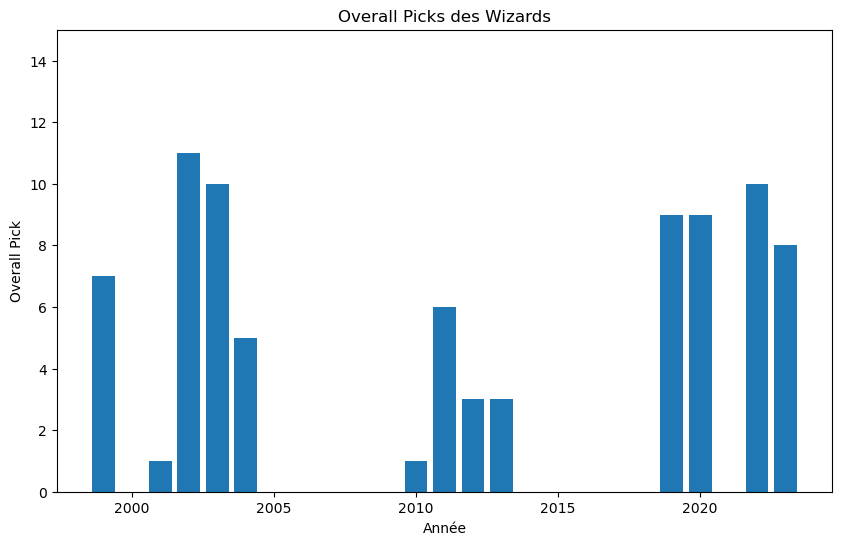

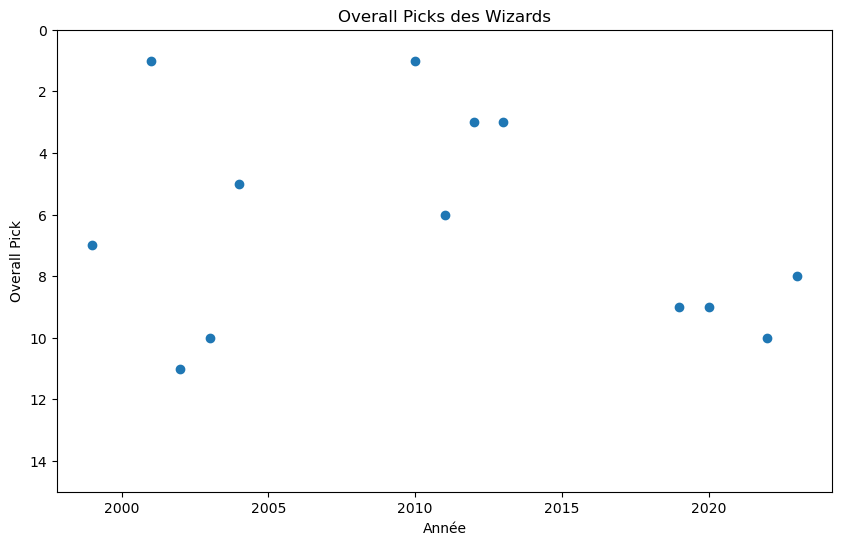

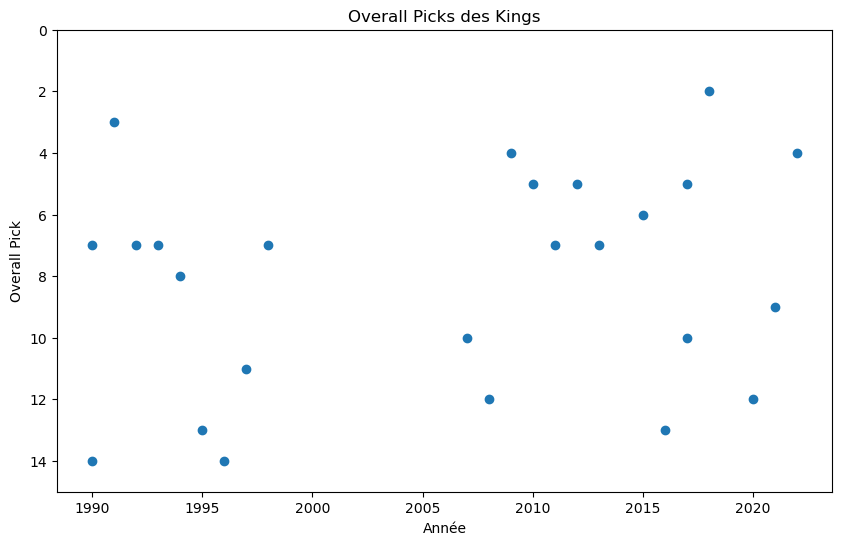

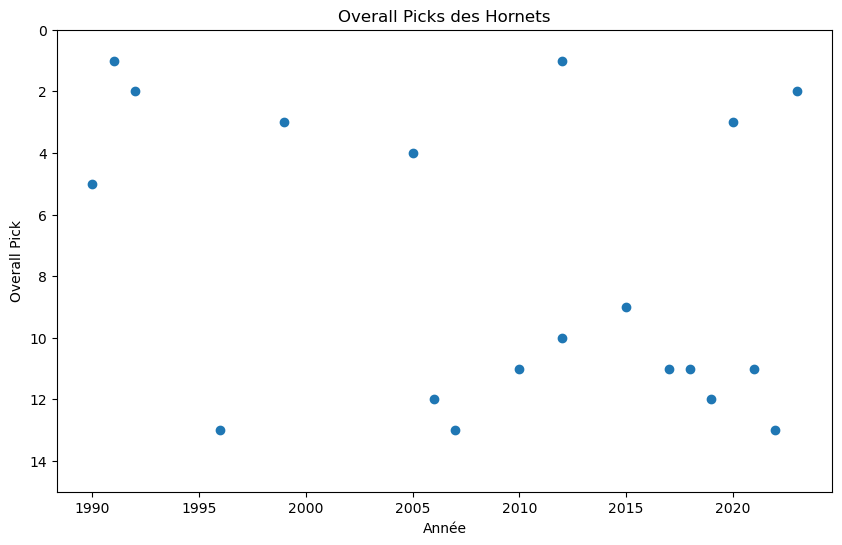

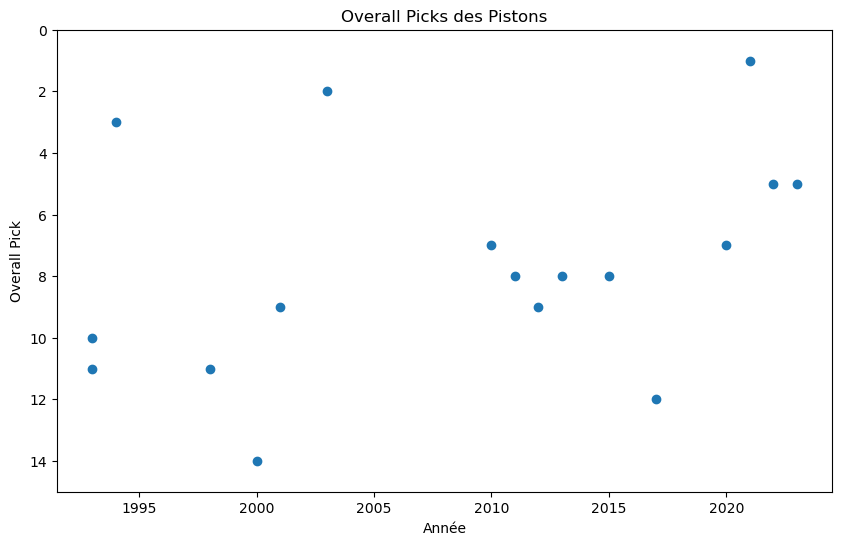

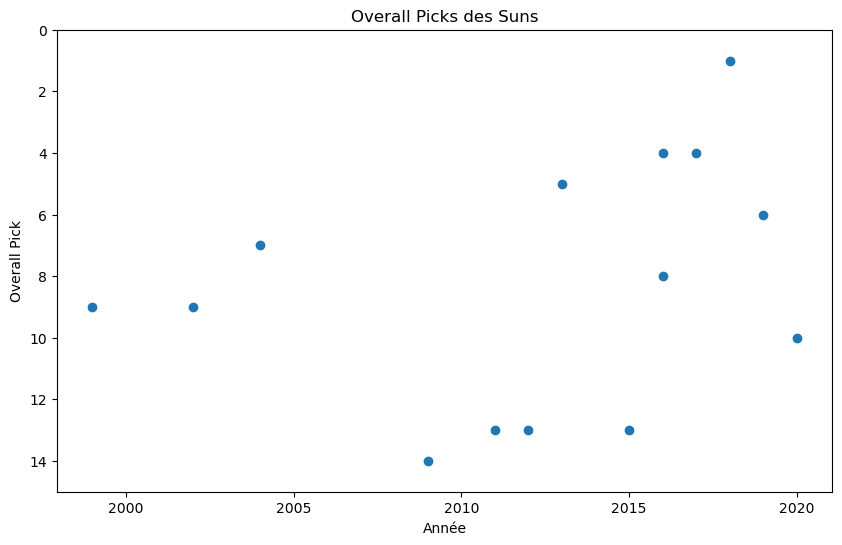

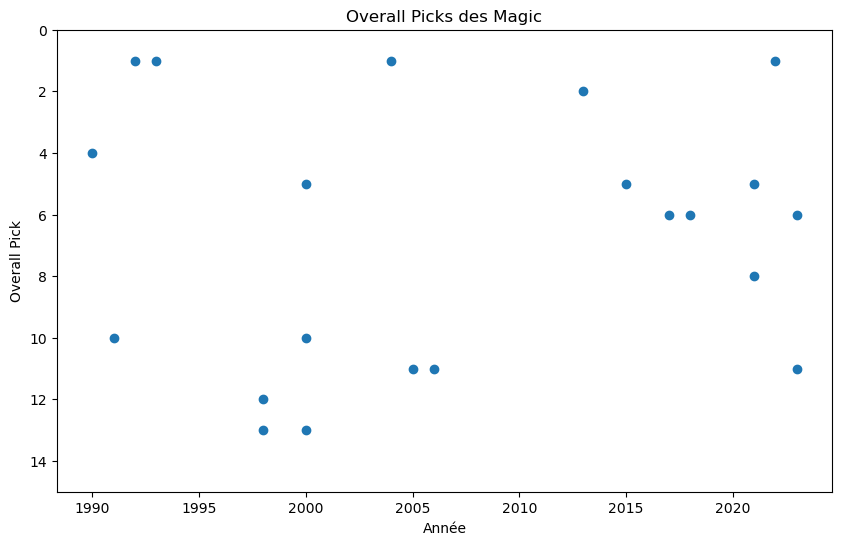

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

df_common_player=pd.read_csv("common_player_info.csv")
df_draft_history=pd.read_csv("draft_history.csv")
df_game=pd.read_csv("game.csv")
df_other_stats=pd.read_csv("other_stats.csv")
df_draft_history.head()

df_draft_history.columns
df_draft_history["season"].unique()
# On s'intéresse à la période post 2010
df_draft_history= df_draft_history[df_draft_history['season'] >= 1990]
# On garde seulement les lottery picks
df_draft_history=df_draft_history[df_draft_history['overall_pick'] <= 14]
df_draft_history["season"].unique()
df_draft_history.head()
overall_pick = df_draft_history['overall_pick']
team_name = df_draft_history['team_name']
team_counts = team_name.value_counts()

# Créer un graphique à barres
plt.figure(figsize=(12, 6))
plt.bar(team_counts.index, team_counts.values)
plt.xlabel('Équipe')
plt.ylabel('Nombre de picks')
plt.title('Nombre de lottery pick par équipe depuis 2010')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df_draft_history.head()


#HUGO démarre là

# On s'intéresse à la période post 2010
df_draft_history= df_draft_history[df_draft_history['season'] >= 1990]
#On veut l'overall pick dans les 5 premières équipes de la lotterie = top 5
#On va créer un df "top5_team_overall_pick"

top5_team_overall_pick = df_draft_history[['overall_pick', 'team_name', 'season']]
top5_team_overall_pick.head()
top5_team_overall_pick_sample = top5_team_overall_pick.sample(n=10)
print(top5_team_overall_pick_sample)

import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les Wizards
wizards_picks = top5_team_overall_pick[top5_team_overall_pick['team_name'] == 'Wizards']

# Créer les listes pour les années et les overall_pick
years = wizards_picks['season'].tolist()
picks = wizards_picks['overall_pick'].tolist()

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(years, picks, bottom=0)

# Ajuster les limites des ordonnées de 0 à 14
ax.set_ylim(0, 15)

# Ajouter les labels et le titre
ax.set_xlabel('Année')
ax.set_ylabel('Overall Pick')
ax.set_title('Overall Picks des Wizards')

# Afficher le graphique
plt.show()

#WIZARDS

import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les Wizards
wizards_picks = top5_team_overall_pick[top5_team_overall_pick['team_name'] == 'Wizards']

# Créer les listes pour les années et les overall_pick
years = wizards_picks['season'].tolist()
picks = wizards_picks['overall_pick'].tolist()

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(years, picks)

# Ajuster les limites des ordonnées de 0 à 14
ax.set_ylim(15, 0)

# Ajouter les labels et le titre
ax.set_xlabel('Année')
ax.set_ylabel('Overall Pick')
ax.set_title('Overall Picks des Wizards')

# Afficher le graphique
plt.show()

#Moyenne des pick sur 14 ans avec arrondi à un entier
team_avg_pick = top5_team_overall_pick.groupby('team_name')['overall_pick'].mean().reset_index().round()
team_avg_pick.head()
#Kings

import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les Kings
Kings_picks = top5_team_overall_pick[top5_team_overall_pick['team_name'] == 'Kings']

# Créer les listes pour les années et les overall_pick
years = Kings_picks['season'].tolist()
picks = Kings_picks['overall_pick'].tolist()

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(years, picks)

# Ajuster les limites des ordonnées de 0 à 14
ax.set_ylim(15, 0)

# Ajouter les labels et le titre
ax.set_xlabel('Année')
ax.set_ylabel('Overall Pick')
ax.set_title('Overall Picks des Kings')

# Afficher le graphique
plt.show()

#Hornets

import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les Hornets
Hornets_picks = top5_team_overall_pick[top5_team_overall_pick['team_name'] == 'Hornets']

# Créer les listes pour les années et les overall_pick
years = Hornets_picks['season'].tolist()
picks = Hornets_picks['overall_pick'].tolist()

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(years, picks)

# Ajuster les limites des ordonnées de 0 à 14
ax.set_ylim(15, 0)

# Ajouter les labels et le titre
ax.set_xlabel('Année')
ax.set_ylabel('Overall Pick')
ax.set_title('Overall Picks des Hornets')

# Afficher le graphique
plt.show()
#Pistons

import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les Pistons
Pistons_picks = top5_team_overall_pick[top5_team_overall_pick['team_name'] == 'Pistons']

# Créer les listes pour les années et les overall_pick
years = Pistons_picks['season'].tolist()
picks = Pistons_picks['overall_pick'].tolist()

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(years, picks)

# Ajuster les limites des ordonnées de 0 à 14
ax.set_ylim(15, 0)

# Ajouter les labels et le titre
ax.set_xlabel('Année')
ax.set_ylabel('Overall Pick')
ax.set_title('Overall Picks des Pistons')

# Afficher le graphique
plt.show()
#Suns

import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les Suns
Suns_picks = top5_team_overall_pick[top5_team_overall_pick['team_name'] == 'Suns']

# Créer les listes pour les années et les overall_pick
years = Suns_picks['season'].tolist()
picks = Suns_picks['overall_pick'].tolist()

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(years, picks)

# Ajuster les limites des ordonnées de 0 à 14
ax.set_ylim(15, 0)

# Ajouter les labels et le titre
ax.set_xlabel('Année')
ax.set_ylabel('Overall Pick')
ax.set_title('Overall Picks des Suns')

# Afficher le graphique
plt.show()
#Magic

import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les Magic
Magic_picks = top5_team_overall_pick[top5_team_overall_pick['team_name'] == 'Magic']

# Créer les listes pour les années et les overall_pick
years = Magic_picks['season'].tolist()
picks = Magic_picks['overall_pick'].tolist()

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(years, picks)

# Ajuster les limites des ordonnées de 0 à 14
ax.set_ylim(15, 0)

# Ajouter les labels et le titre
ax.set_xlabel('Année')
ax.set_ylabel('Overall Pick')
ax.set_title('Overall Picks des Magic')

# Afficher le graphique
plt.show()

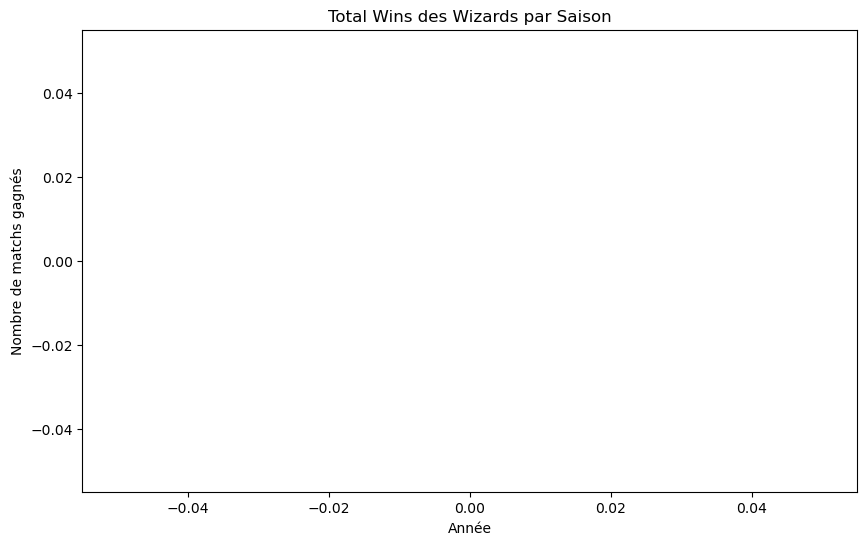

In [195]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded the data and have the df_new_game_home DataFrame
# Filter data for the Wizards
wizards_data = df_new_game_home[df_new_game_home['team_name_home'] == 'Wizards']

# Extract total wins and years
wizards_wins = wizards_data['somme'].tolist()
wizards_years = wizards_data['season_id'].tolist()

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(wizards_years, wizards_wins, marker='o', linestyle='-', label='Total Wins')

# Add labels and title
plt.xlabel('Année')
plt.ylabel('Nombre de matchs gagnés')
plt.title('Total Wins des Wizards par Saison')

# Show the graph
plt.show()


In [196]:
top5_team_overall_pick.head()
df_new_game_home.head()

,index,team_name_home,season_id,wl_home,total_home,total_away,somme
0,0,Atlanta Hawks,1990,W,29,14,43
1,2,Atlanta Hawks,1991,W,23,15,38
2,4,Atlanta Hawks,1992,W,25,18,43
3,6,Atlanta Hawks,1993,W,36,21,57
4,8,Atlanta Hawks,1994,W,24,18,42


In [197]:
r = top5_team_overall_pick.sample(5)
print(r)

      overall_pick  team_name  season
6336             1   Warriors    1995
7885            12    Thunder    2022
7225            12  Grizzlies    2010
6631             7      Bulls    2000
6684             2   Clippers    2001


In [198]:
#Modification de df_new_game_home pour garder que le dernier mot des équipes

# Fonction lambda pour extraire le dernier mot
def dernier_mot(nom_equipe):
  return nom_equipe.split()[-1]

# Appliquer la fonction lambda à la colonne 'team_name_home'
df_new_game_home['team_name_home'] = df_new_game_home['team_name_home'].apply(dernier_mot)

r = df_new_game_home.sample(5)
print(r)

     index team_name_home  season_id wl_home  total_home  total_away  somme
230    460        Nuggets       2021       W          23          25     48
481    962          Bucks       1994       W          22          12     34
156    313      Cavaliers       2010       W          12           7     19
731   1462        Blazers       1996       W          29          20     49
650   1300          Magic       2011       W          21          16     37


In [199]:
# Renommer les colonnes pour faciliter la jointure
top5_team_overall_pick = top5_team_overall_pick.rename(columns={'team_name': 'team_name_home', 'season': 'season_id'})

# Effectuer la jointure avec la méthode merge()
df_merged_top5pick_newgamehome = pd.merge(df_new_game_home, top5_team_overall_pick, how='inner', on=['team_name_home', 'season_id'])
df_merged_top5pick_newgamehome.head()

,index,team_name_home,season_id,wl_home,total_home,total_away,somme,overall_pick
0,0,Hawks,1990,W,29,14,43,10
1,2,Hawks,1991,W,23,15,38,9
2,4,Hawks,1992,W,25,18,43,10
3,18,Hawks,1999,W,21,7,28,10
4,21,Hawks,2000,W,18,7,25,6


In [204]:
merged2_df = pd.merge(df_draft_history, df_common_player, on='person_id', how='outer')
merged2_df.head()

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id_x,team_city_x,team_name_x,team_abbreviation_x,organization,organization_type,player_profile_flag,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,last_affiliation,height,weight,season_exp,jersey,position,rosterstatus,games_played_current_season_flag,team_id_y,team_name_y,team_abbreviation_y,team_code,team_city_y,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,934,Derrick Coleman,1990.0,1.0,1.0,1.0,Draft,1.610613e+09,New Jersey,Nets,NJN,Syracuse,College/University,1.0,Derrick,Coleman,Derrick Coleman,"Coleman, Derrick",D. Coleman,derrick-coleman,1967-06-21 00:00:00,Syracuse,USA,Syracuse/USA,6-10,270.0,15.0,NaN,Forward,Inactive,N,0.000000e+00,NaN,NaN,NaN,NaN,derrick_coleman,1990.0,2004.0,N,Y,Y,1990,1,1,N
1,56,Gary Payton,1990.0,1.0,2.0,2.0,Draft,1.610613e+09,Seattle,SuperSonics,SEA,Oregon State,College/University,1.0,Gary,Payton,Gary Payton,"Payton, Gary",G. Payton,gary-payton,1968-07-23 00:00:00,Oregon State,USA,Oregon State/USA,6-4,190.0,18.0,20,Guard,Inactive,N,1.610613e+09,SuperSonics,SEA,thunder,Seattle,gary_payton,1990.0,2006.0,N,Y,Y,1990,1,2,Y
2,51,Mahmoud Abdul-Rauf,1990.0,1.0,3.0,3.0,Draft,1.610613e+09,Denver,Nuggets,DEN,Louisiana State,College/University,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,192,Dennis Scott,1990.0,1.0,4.0,4.0,Draft,1.610613e+09,Orlando,Magic,ORL,Georgia Tech,College/University,1.0,Dennis,Scott,Dennis Scott,"Scott, Dennis",D. Scott,dennis-scott,1968-09-05 00:00:00,Georgia Tech,USA,Georgia Tech/USA,6-8,229.0,10.0,9,Forward,Inactive,N,1.610613e+09,Magic,ORL,magic,Orlando,dennis_scott,1990.0,1999.0,N,Y,Y,1990,1,4,N
4,383,Kendall Gill,1990.0,1.0,5.0,5.0,Draft,1.610613e+09,Charlotte,Hornets,CHH,Illinois,College/University,1.0,Kendall,Gill,Kendall Gill,"Gill, Kendall",K. Gill,kendall-gill,1968-05-25 00:00:00,Illinois,USA,Illinois/USA,6-5,216.0,15.0,NaN,Guard,Inactive,N,0.000000e+00,NaN,NaN,NaN,NaN,kendall_gill,1990.0,2004.0,N,Y,Y,1990,1,5,N


In [205]:
boston_rows = merged2_df.loc[(merged2_df['team_city_x'].str.contains('Boston')) | 
                             (merged2_df['team_city_y'].str.contains('Boston'))]

boston_rows.head()


,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id_x,team_city_x,team_name_x,team_abbreviation_x,organization,organization_type,player_profile_flag,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,last_affiliation,height,weight,season_exp,jersey,position,rosterstatus,games_played_current_season_flag,team_id_y,team_name_y,team_abbreviation_y,team_code,team_city_y,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
64,376,Eric Montross,1994.0,1.0,9.0,9.0,Draft,1.610613e+09,Boston,Celtics,BOS,North Carolina,College/University,1.0,Eric,Montross,Eric Montross,"Montross, Eric",E. Montross,eric-montross,1971-09-23 00:00:00,North Carolina,USA,North Carolina/USA,7-0,270.0,9.0,00,Center,Inactive,N,1.610613e+09,Pistons,DET,pistons,Detroit,eric_montross,1994.0,2002.0,N,Y,Y,1994,1,9,N
83,677,Eric Williams,1995.0,1.0,14.0,14.0,Draft,1.610613e+09,Boston,Celtics,BOS,Providence,College/University,1.0,Eric,Williams,Eric Williams,"Williams, Eric",E. Williams,eric-williams,1972-07-17 00:00:00,Providence,USA,Providence/USA,6-8,220.0,12.0,NaN,Guard-Forward,Inactive,N,0.000000e+00,NaN,NaN,NaN,NaN,eric_williams,1995.0,2006.0,Y,Y,Y,1995,1,14,N
89,952,Antoine Walker,1996.0,1.0,6.0,6.0,Draft,1.610613e+09,Boston,Celtics,BOS,Kentucky,College/University,1.0,Antoine,Walker,Antoine Walker,"Walker, Antoine",A. Walker,antoine-walker,1976-08-12 00:00:00,Kentucky,USA,Kentucky/USA,6-9,245.0,13.0,24,Forward,Inactive,N,1.610613e+09,Celtics,BOS,celtics,Boston,antoine_walker,1996.0,2007.0,Y,Y,Y,1996,1,6,N
95,958,Vitaly Potapenko,1996.0,1.0,12.0,12.0,Draft,1.610613e+09,Cleveland,Cavaliers,CLE,Wright State,College/University,1.0,Vitaly,Potapenko,Vitaly Potapenko,"Potapenko, Vitaly",V. Potapenko,vitaly-potapenko,1975-03-21 00:00:00,Wright State,Ukraine,Wright State/Ukraine,6-10,285.0,12.0,20,Center-Forward,Inactive,N,1.610613e+09,Celtics,BOS,celtics,Boston,vitaly_potapenko,1996.0,2006.0,N,Y,Y,1996,1,12,N
100,1497,Chauncey Billups,1997.0,1.0,3.0,3.0,Draft,1.610613e+09,Boston,Celtics,BOS,Colorado,College/University,1.0,Chauncey,Billups,Chauncey Billups,"Billups, Chauncey",C. Billups,chauncey-billups,1976-09-25 00:00:00,Colorado,USA,Colorado/USA,6-3,210.0,17.0,1,Guard,Inactive,N,1.610613e+09,Pistons,DET,pistons,Detroit,chauncey_billups,1997.0,2013.0,N,Y,Y,1997,1,3,N


In [206]:
boston_rows_after_2013 = merged2_df.loc[(merged2_df['team_city_x'].str.contains('Boston')) |
                                        (merged2_df['team_city_y'].str.contains('Boston')) &
                                        (merged2_df['season'] > 2013)]
boston_rows.head()

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id_x,team_city_x,team_name_x,team_abbreviation_x,organization,organization_type,player_profile_flag,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,last_affiliation,height,weight,season_exp,jersey,position,rosterstatus,games_played_current_season_flag,team_id_y,team_name_y,team_abbreviation_y,team_code,team_city_y,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
64,376,Eric Montross,1994.0,1.0,9.0,9.0,Draft,1.610613e+09,Boston,Celtics,BOS,North Carolina,College/University,1.0,Eric,Montross,Eric Montross,"Montross, Eric",E. Montross,eric-montross,1971-09-23 00:00:00,North Carolina,USA,North Carolina/USA,7-0,270.0,9.0,00,Center,Inactive,N,1.610613e+09,Pistons,DET,pistons,Detroit,eric_montross,1994.0,2002.0,N,Y,Y,1994,1,9,N
83,677,Eric Williams,1995.0,1.0,14.0,14.0,Draft,1.610613e+09,Boston,Celtics,BOS,Providence,College/University,1.0,Eric,Williams,Eric Williams,"Williams, Eric",E. Williams,eric-williams,1972-07-17 00:00:00,Providence,USA,Providence/USA,6-8,220.0,12.0,NaN,Guard-Forward,Inactive,N,0.000000e+00,NaN,NaN,NaN,NaN,eric_williams,1995.0,2006.0,Y,Y,Y,1995,1,14,N
89,952,Antoine Walker,1996.0,1.0,6.0,6.0,Draft,1.610613e+09,Boston,Celtics,BOS,Kentucky,College/University,1.0,Antoine,Walker,Antoine Walker,"Walker, Antoine",A. Walker,antoine-walker,1976-08-12 00:00:00,Kentucky,USA,Kentucky/USA,6-9,245.0,13.0,24,Forward,Inactive,N,1.610613e+09,Celtics,BOS,celtics,Boston,antoine_walker,1996.0,2007.0,Y,Y,Y,1996,1,6,N
95,958,Vitaly Potapenko,1996.0,1.0,12.0,12.0,Draft,1.610613e+09,Cleveland,Cavaliers,CLE,Wright State,College/University,1.0,Vitaly,Potapenko,Vitaly Potapenko,"Potapenko, Vitaly",V. Potapenko,vitaly-potapenko,1975-03-21 00:00:00,Wright State,Ukraine,Wright State/Ukraine,6-10,285.0,12.0,20,Center-Forward,Inactive,N,1.610613e+09,Celtics,BOS,celtics,Boston,vitaly_potapenko,1996.0,2006.0,N,Y,Y,1996,1,12,N
100,1497,Chauncey Billups,1997.0,1.0,3.0,3.0,Draft,1.610613e+09,Boston,Celtics,BOS,Colorado,College/University,1.0,Chauncey,Billups,Chauncey Billups,"Billups, Chauncey",C. Billups,chauncey-billups,1976-09-25 00:00:00,Colorado,USA,Colorado/USA,6-3,210.0,17.0,1,Guard,Inactive,N,1.610613e+09,Pistons,DET,pistons,Detroit,chauncey_billups,1997.0,2013.0,N,Y,Y,1997,1,3,N


NameError: name 'x_filtered' is not defined

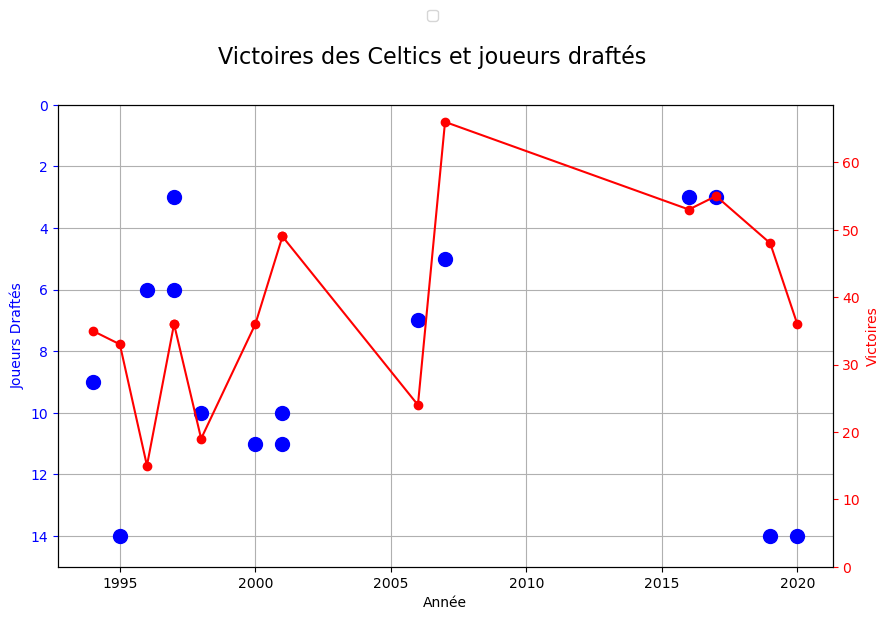

In [217]:
from scipy.stats import linregress

# Filtrer les données pour l'équipe "Celtics"
Celtics_data = df_merged_top5pick_newgamehome[df_merged_top5pick_newgamehome['team_name_home'] == 'Celtics']

# Créer la figure et l'axe principal
fig, ax1 = plt.subplots(figsize=(10, 6))

# Ajouter un titre
fig.suptitle("Victoires des Celtics et joueurs draftés", fontsize=16)

# Tracer l'overall_pick en fonction de season_id
ax1.scatter(Celtics_data['season_id'], Celtics_data['overall_pick'], color='b', marker='o', s=100, zorder=2)
ax1.set_xlabel('Année')
ax1.set_ylabel('Joueurs Draftés', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(15, 0)

# Créer un axe secondaire pour la somme
ax2 = ax1.twinx()
ax2.plot(Celtics_data['season_id'], Celtics_data['somme'], color='r', marker='o', zorder=1)
ax2.set_ylabel('Victoires', color='r')
ax2.tick_params('y', colors='r')

# Ajuster les limites des axes
ax2.set_ylim(bottom=0)

# Ajouter une légende en dehors du graphique
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines1 + lines2, ['Joueurs Draftés', 'Victoires'], loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))

# Ajouter un quadrillage
ax1.grid(True, zorder=0)
ax2.grid(False)

slope, intercept, r_value, p_value, std_err = linregress(x_filtered, y1_filtered)
y1_trend = slope * x_filtered + intercept
ax1.plot(x_filtered, y1_trend, color='tab:orange', linestyle='--', label='Tendance')

# Afficher le graphique
plt.show()


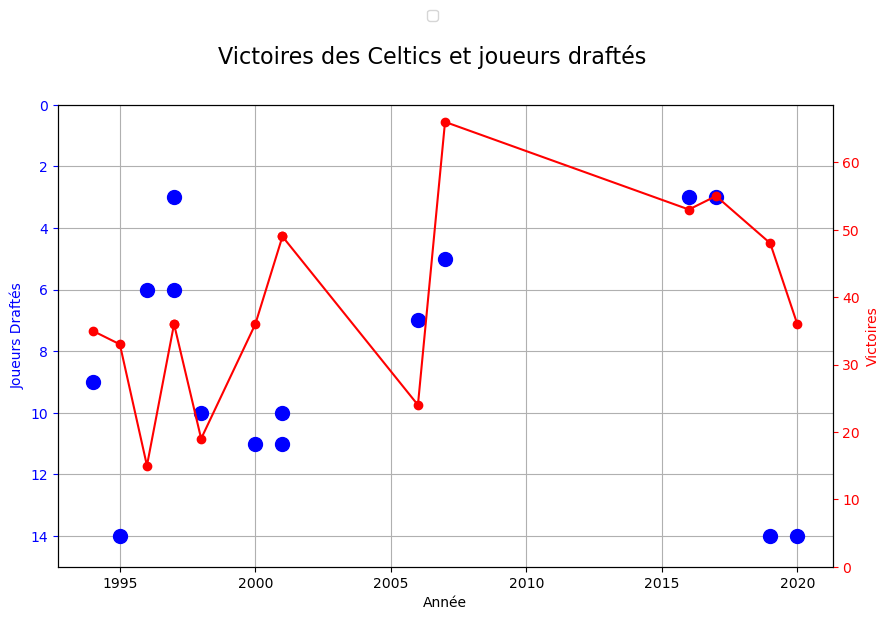

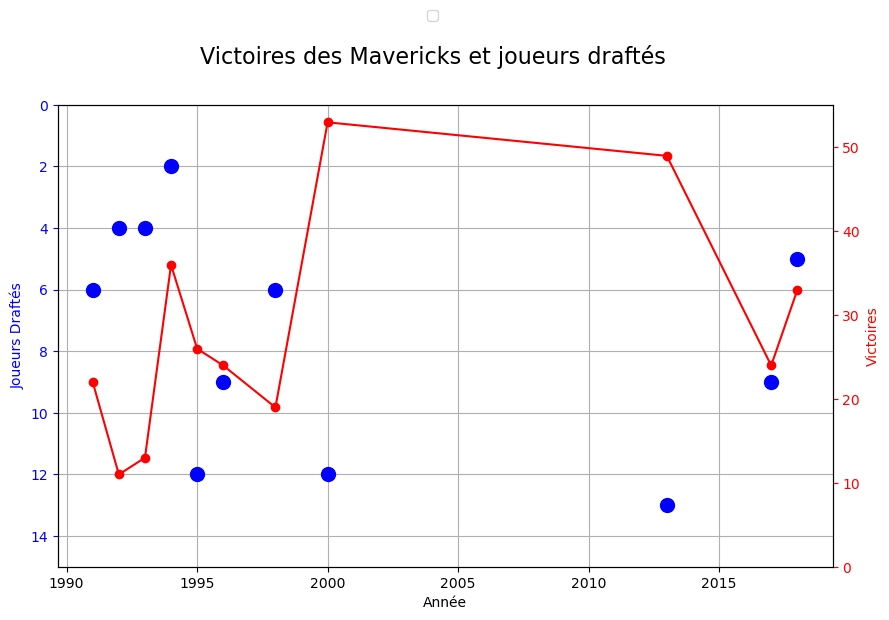

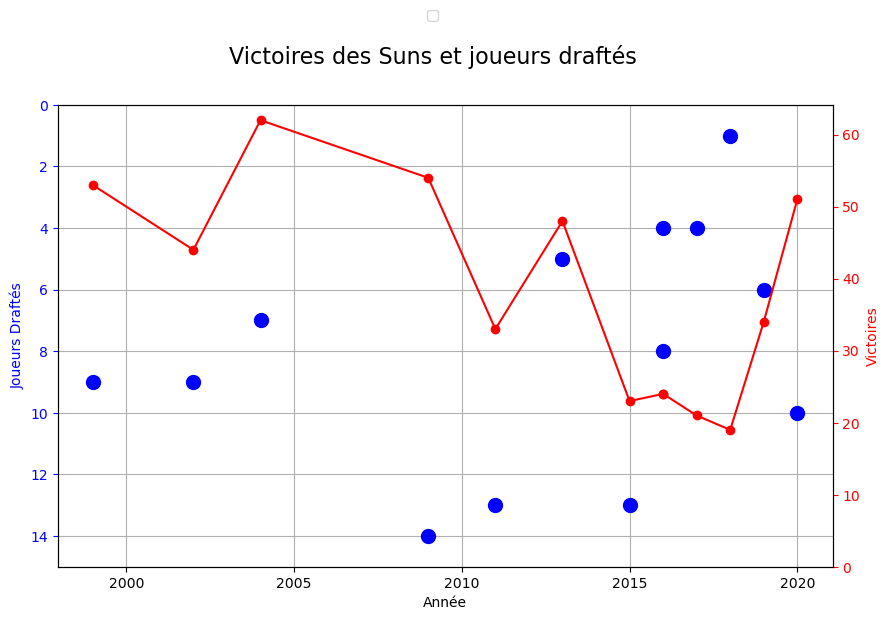

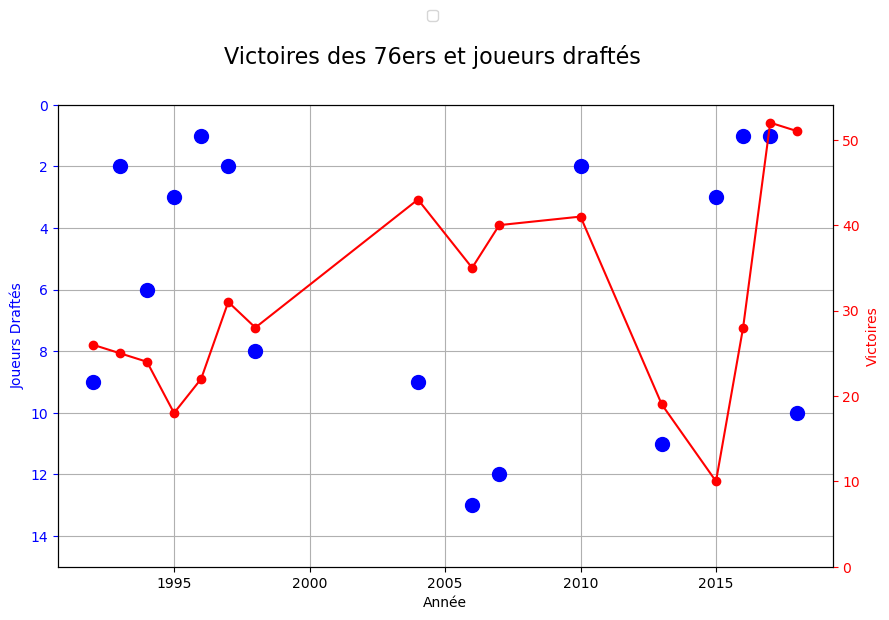

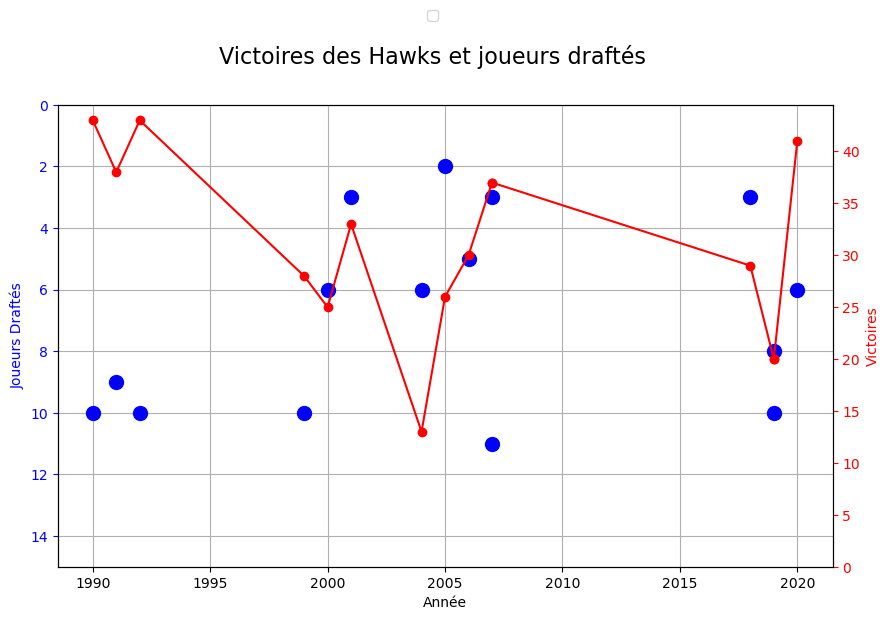

In [214]:
# Filtrer les données pour l'équipe "Celtics"
Celtics_data = df_merged_top5pick_newgamehome[df_merged_top5pick_newgamehome['team_name_home'] == 'Celtics']

# Créer la figure et l'axe principal
fig, ax1 = plt.subplots(figsize=(10, 6))

# Ajouter un titre
fig.suptitle("Victoires des Celtics et joueurs draftés", fontsize=16)

# Tracer l'overall_pick en fonction de season_id
ax1.scatter(Celtics_data['season_id'], Celtics_data['overall_pick'], color='b', marker='o', s=100, zorder=2) # Augmenter la taille et le zorder des points bleus
ax1.set_xlabel('Année')
ax1.set_ylabel('Joueurs Draftés', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(15, 0) # Inverser l'échelle de l'axe des ordonnées

# Créer un axe secondaire pour la somme
ax2 = ax1.twinx()
ax2.plot(Celtics_data['season_id'], Celtics_data['somme'], color='r', marker='o', zorder=1) # Ajouter un zorder aux points rouges
ax2.set_ylabel('Victoires', color='r')
ax2.tick_params('y', colors='r')

# Ajuster les limites des axes
ax2.set_ylim(bottom=0)

# Ajouter une légende en dehors du graphique
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines1 + lines2, ['Joueurs Draftés', 'Victoires'], loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))

# Ajouter un quadrillage
ax1.grid(True, zorder=0) # Ajouter un zorder au quadrillage
ax2.grid(False)

# Afficher le graphique
plt.show()

# Filtrer les données pour les Mavericks
Mavericks_data = df_merged_top5pick_newgamehome[df_merged_top5pick_newgamehome['team_name_home'] == 'Mavericks']

# Créer la figure et l'axe principal pour les Mavericks
fig1, ax1 = plt.subplots(figsize=(10, 6))
fig1.suptitle("Victoires des Mavericks et joueurs draftés", fontsize=16)

ax1.scatter(Mavericks_data['season_id'], Mavericks_data['overall_pick'], color='b', marker='o', s=100, zorder=2)
ax1.set_xlabel('Année')
ax1.set_ylabel('Joueurs Draftés', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(15, 0)

ax2 = ax1.twinx()
ax2.plot(Mavericks_data['season_id'], Mavericks_data['somme'], color='r', marker='o', zorder=1)
ax2.set_ylabel('Victoires', color='r')
ax2.tick_params('y', colors='r')

ax2.set_ylim(bottom=0)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig1.legend(lines1 + lines2, ['Joueurs Draftés', 'Victoires'], loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))

ax1.grid(True, zorder=0)
ax2.grid(False)

plt.show()

# Filtrer les données pour les Suns
Suns_data = df_merged_top5pick_newgamehome[df_merged_top5pick_newgamehome['team_name_home'] == 'Suns']

# Créer la figure et l'axe principal pour les Suns
fig2, ax1 = plt.subplots(figsize=(10, 6))
fig2.suptitle("Victoires des Suns et joueurs draftés", fontsize=16)

ax1.scatter(Suns_data['season_id'], Suns_data['overall_pick'], color='b', marker='o', s=100, zorder=2)
ax1.set_xlabel('Année')
ax1.set_ylabel('Joueurs Draftés', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(15, 0)

ax2 = ax1.twinx()
ax2.plot(Suns_data['season_id'], Suns_data['somme'], color='r', marker='o', zorder=1)
ax2.set_ylabel('Victoires', color='r')
ax2.tick_params('y', colors='r')

ax2.set_ylim(bottom=0)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig2.legend(lines1 + lines2, ['Joueurs Draftés', 'Victoires'], loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))

ax1.grid(True, zorder=0)
ax2.grid(False)

plt.show()

# Filtrer les données pour les p76ers
p76ers_data = df_merged_top5pick_newgamehome[df_merged_top5pick_newgamehome['team_name_home'] == '76ers']

# Créer la figure et l'axe principal pour les p76ers
fig3, ax1 = plt.subplots(figsize=(10, 6))
fig3.suptitle("Victoires des 76ers et joueurs draftés", fontsize=16)

ax1.scatter(p76ers_data['season_id'], p76ers_data['overall_pick'], color='b', marker='o', s=100, zorder=2)
ax1.set_xlabel('Année')
ax1.set_ylabel('Joueurs Draftés', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(15, 0)

ax2 = ax1.twinx()
ax2.plot(p76ers_data['season_id'], p76ers_data['somme'], color='r', marker='o', zorder=1)
ax2.set_ylabel('Victoires', color='r')
ax2.tick_params('y', colors='r')

ax2.set_ylim(bottom=0)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig3.legend(lines1 + lines2, ['Joueurs Draftés', 'Victoires'], loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))

ax1.grid(True, zorder=0)
ax2.grid(False)

plt.show()

# Filtrer les données pour les Hawks
Hawks_data = df_merged_top5pick_newgamehome[df_merged_top5pick_newgamehome['team_name_home'] == 'Hawks']

# Créer la figure et l'axe principal pour les Hawks
fig2, ax1 = plt.subplots(figsize=(10, 6))
fig2.suptitle("Victoires des Hawks et joueurs draftés", fontsize=16)

ax1.scatter(Hawks_data['season_id'], Hawks_data['overall_pick'], color='b', marker='o', s=100, zorder=2)
ax1.set_xlabel('Année')
ax1.set_ylabel('Joueurs Draftés', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(15, 0)

ax2 = ax1.twinx()
ax2.plot(Hawks_data['season_id'], Hawks_data['somme'], color='r', marker='o', zorder=1)
ax2.set_ylabel('Victoires', color='r')
ax2.tick_params('y', colors='r')

ax2.set_ylim(bottom=0)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig2.legend(lines1 + lines2, ['Joueurs Draftés', 'Victoires'], loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))

ax1.grid(True, zorder=0)
ax2.grid(False)

plt.show()